# Estudo sobre incertezas em dados de poços 

In [1]:
! pip install --upgrade uncertainties

In [2]:
! pip install lasio

In [47]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy import signal
import pandas as pd
import lasio
import matplotlib.pyplot as plt

#modulos internos
import os,sys
sys.path.append('../modulos')
import imod
from imod import Statistical
from graficador import plotagem as plm2



#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (20,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

#Pacote de incertezas
from uncertainties import ufloat
from uncertainties.umath import *


#Plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from os import getcwd, listdir
from os.path import isfile, join 

# Lendo os dados de entrada

In [4]:
#COT calculado via DRlog
cab = ['Depth','COT','DT','GR','NPHI','RHOB']
datareal = pd.read_csv('../saidas/1-ESS-120_resample_COT.txt', sep='\\s+',
                       skiprows=1, names = cab, usecols=(0,1,2,3,4,5))
df = pd.DataFrame(datareal)
print(len(df))
#separando as informações do dado em variáveis distintas
z = df[df.columns[0]]#prof
COT = df[df.columns[1]]
DT = df[df.columns[2]]#sonico
GR = df[df.columns[3]]#GR
NPHI = df[df.columns[4]]#neutrao
RHOB = df[df.columns[5]]#densidade

7340


In [5]:
df

,Depth,COT,DT,GR,NPHI,RHOB
0,4800.1046,5.400561,70.30501,157.6507,14.05369,2.616479
1,4800.3046,4.322480,73.25121,127.1674,11.76468,2.605533
2,4800.5046,4.061132,76.35267,119.7623,17.90119,2.585634
3,4800.7046,4.224416,78.27454,124.3640,21.43119,2.587109
4,4800.9046,4.050501,76.25685,119.4625,19.73067,2.608446
...,...,...,...,...,...,...
7335,6395.9046,5.417372,74.54109,158.4027,12.76359,2.693078
7336,6396.1046,5.417345,73.37498,158.4027,12.04690,2.707989
7337,6396.3046,5.417919,72.57875,158.4027,11.25337,2.676428
7338,6396.5046,5.418072,72.42371,158.4027,11.04827,2.661956


In [6]:
amostragem = z[1]-z[0]
print('amostragem = ', amostragem)

amostragem =  0.1999999999998181


In [7]:
#Simulação COT Achilles:
cab = ['Depth','RHOB','Prod_1','Sed','PaleoBAT','Frac_areia','Idades','F_carbono','COma','rCO','qCO','COte','COT']
datasimu = pd.read_csv('../entradas/Simulacao_COT_3.las', sep='\\s+',
                       skiprows=44, names = cab, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12))
df_a = pd.DataFrame(datasimu)
z_a = df_a[df_a.columns[0]]#prof
COT_a = df_a[df_a.columns[12]]#COT
print(len(df_a))

8702


In [8]:
df_a

,Depth,RHOB,Prod_1,Sed,PaleoBAT,Frac_areia,Idades,F_carbono,COma,rCO,qCO,COte,COT
0,2062.5,0.71284,134.62163,9.16284,1285.70094,98.35779,62.29210,0.69417,0.17947,0.00821,0.09853,0.10674,0.28622
1,2063.0,0.71284,134.67885,9.16284,1284.22165,98.40674,62.29751,0.69562,0.17985,0.00797,0.09560,0.10356,0.28341
2,2063.5,0.71284,134.73668,9.16274,1282.72865,98.32983,62.30296,0.69708,0.18023,0.00835,0.10021,0.10856,0.28879
3,2064.0,0.71284,134.79462,9.16280,1281.23563,98.23161,62.30842,0.69854,0.18060,0.00884,0.10610,0.11495,0.29555
4,2064.5,0.71284,134.85264,9.16282,1279.74261,98.30800,62.31388,0.70002,0.18098,0.00846,0.10152,0.10998,0.29096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,6411.0,2.57565,150.56350,4.92949,949.41663,88.42063,124.18510,1.19976,0.09134,0.05790,0.69476,0.75266,0.84400
8698,6411.5,2.57565,150.56350,4.92949,949.41663,88.42063,124.19524,1.19976,0.09134,0.05790,0.69476,0.75266,0.84400
8699,6412.0,2.57565,150.56350,4.92949,949.41663,88.42063,124.20539,1.19976,0.09134,0.05790,0.69476,0.75266,0.84400
8700,6412.5,2.57565,150.56350,4.92949,949.41663,88.42063,124.21553,1.19976,0.09134,0.05790,0.69476,0.75266,0.84400


In [9]:
amostragem_a = z_a[1] - z_a[0]
print('amostragem = ', amostragem_a)

amostragem =  0.5


In [10]:
# Selação do intervalo de relevância para redimensionamento dos vetores de entrada
df_a = df_a[(df_a['Depth'] > 4800.1) & (df_a['Depth'] < 6396.7)] 


In [11]:
df_a

,Depth,RHOB,Prod_1,Sed,PaleoBAT,Frac_areia,Idades,F_carbono,COma,rCO,qCO,COte,COT
5476,4800.5,2.40662,124.38332,5.02340,1592.97984,91.72382,100.99374,0.47154,0.03835,0.04138,0.49657,0.53795,0.57630
5477,4801.0,2.41666,124.39233,5.02363,1592.66754,92.38205,101.00266,0.47171,0.03820,0.03809,0.45708,0.49517,0.53337
5478,4801.5,2.30242,124.52377,5.02340,1588.11675,93.12191,101.01186,0.47415,0.04030,0.03439,0.41269,0.44708,0.48738
5479,4802.0,2.42377,124.66650,5.02361,1583.19598,93.80345,101.02182,0.47681,0.03850,0.03098,0.37179,0.40278,0.44128
5480,4802.5,2.49365,124.80981,5.02340,1578.27511,90.82810,101.03177,0.47950,0.03763,0.04586,0.55031,0.59617,0.63381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,6394.5,2.53217,150.56350,4.92949,949.41663,88.42063,123.85038,1.19976,0.09291,0.05790,0.69476,0.75266,0.84557
8665,6395.0,2.58544,150.56350,4.92949,949.41663,88.42063,123.86052,1.19976,0.09099,0.05790,0.69476,0.75266,0.84365
8666,6395.5,2.56679,150.56350,4.92949,949.41663,88.42063,123.87066,1.19976,0.09165,0.05790,0.69476,0.75266,0.84431
8667,6396.0,2.57648,150.56350,4.92949,949.41663,88.42063,123.88081,1.19976,0.09131,0.05790,0.69476,0.75266,0.84397


In [12]:
#separando as informações do dado em variáveis distintas
z_a = df_a[df_a.columns[0]]#prof
COT_a = df_a[df_a.columns[12]]#COT

In [13]:
print(z_a)

5476    4800.5
5477    4801.0
5478    4801.5
5479    4802.0
5480    4802.5
         ...  
8664    6394.5
8665    6395.0
8666    6395.5
8667    6396.0
8668    6396.5
Name: Depth, Length: 3193, dtype: float64


# Fazendo o Resample:

In [14]:
COT_r = signal.resample(COT, 3193)
z_r = signal.resample(z, 3193)
COT_ra = signal.resample(COT_a, 3193)
z_ra = signal.resample(z_a, 3193)

In [68]:
print(np.size(COT_r),np.size(COT_ra))

3193 3193


# Comparando os COTs:

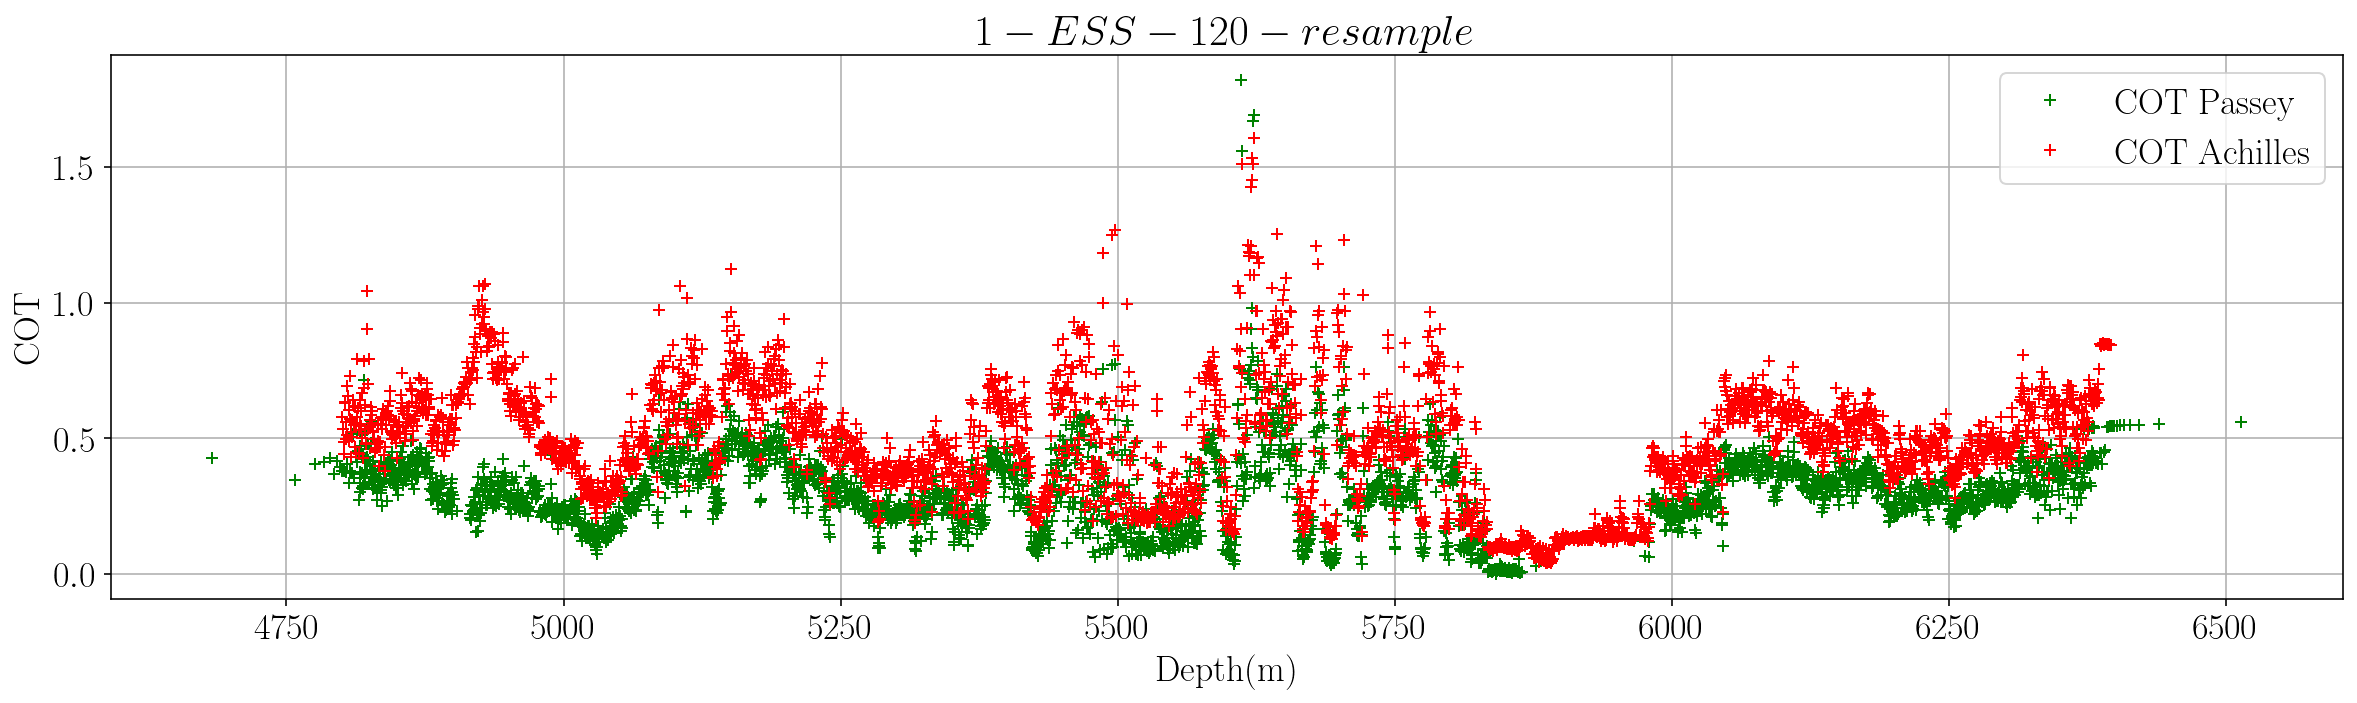

In [96]:
plt.plot(z_r, COT_r/10, 'g+', z_ra, COT_ra,'r+')
plt.grid()
plt.legend(['COT Passey', 'COT Achilles'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/passeyXachilles.png')
plt.show()


In [97]:
# Gráfico interativo Plotly
xaxis = go.layout.XAxis(title="Depth(m)")
yaxis = go.layout.YAxis(title="COT Passey")

fig = go.Figure(layout=go.Layout(title="$1-ESS-120-resample$", xaxis=xaxis, yaxis=yaxis))
fig.add_trace(go.Scatter(x=z_r, y=COT_r/10, mode="markers"))
fig.show()

In [98]:
# Gráfico interativo Plotly
xaxis = go.layout.XAxis(title="Depth(m)")
yaxis = go.layout.YAxis(title="COT Achilles")

fig = go.Figure(layout=go.Layout(title="$1-ESS-120-resample$", xaxis=xaxis, yaxis=yaxis))
fig.add_trace(go.Scatter(x=z_ra, y=COT_ra, mode="markers"))
fig.show()

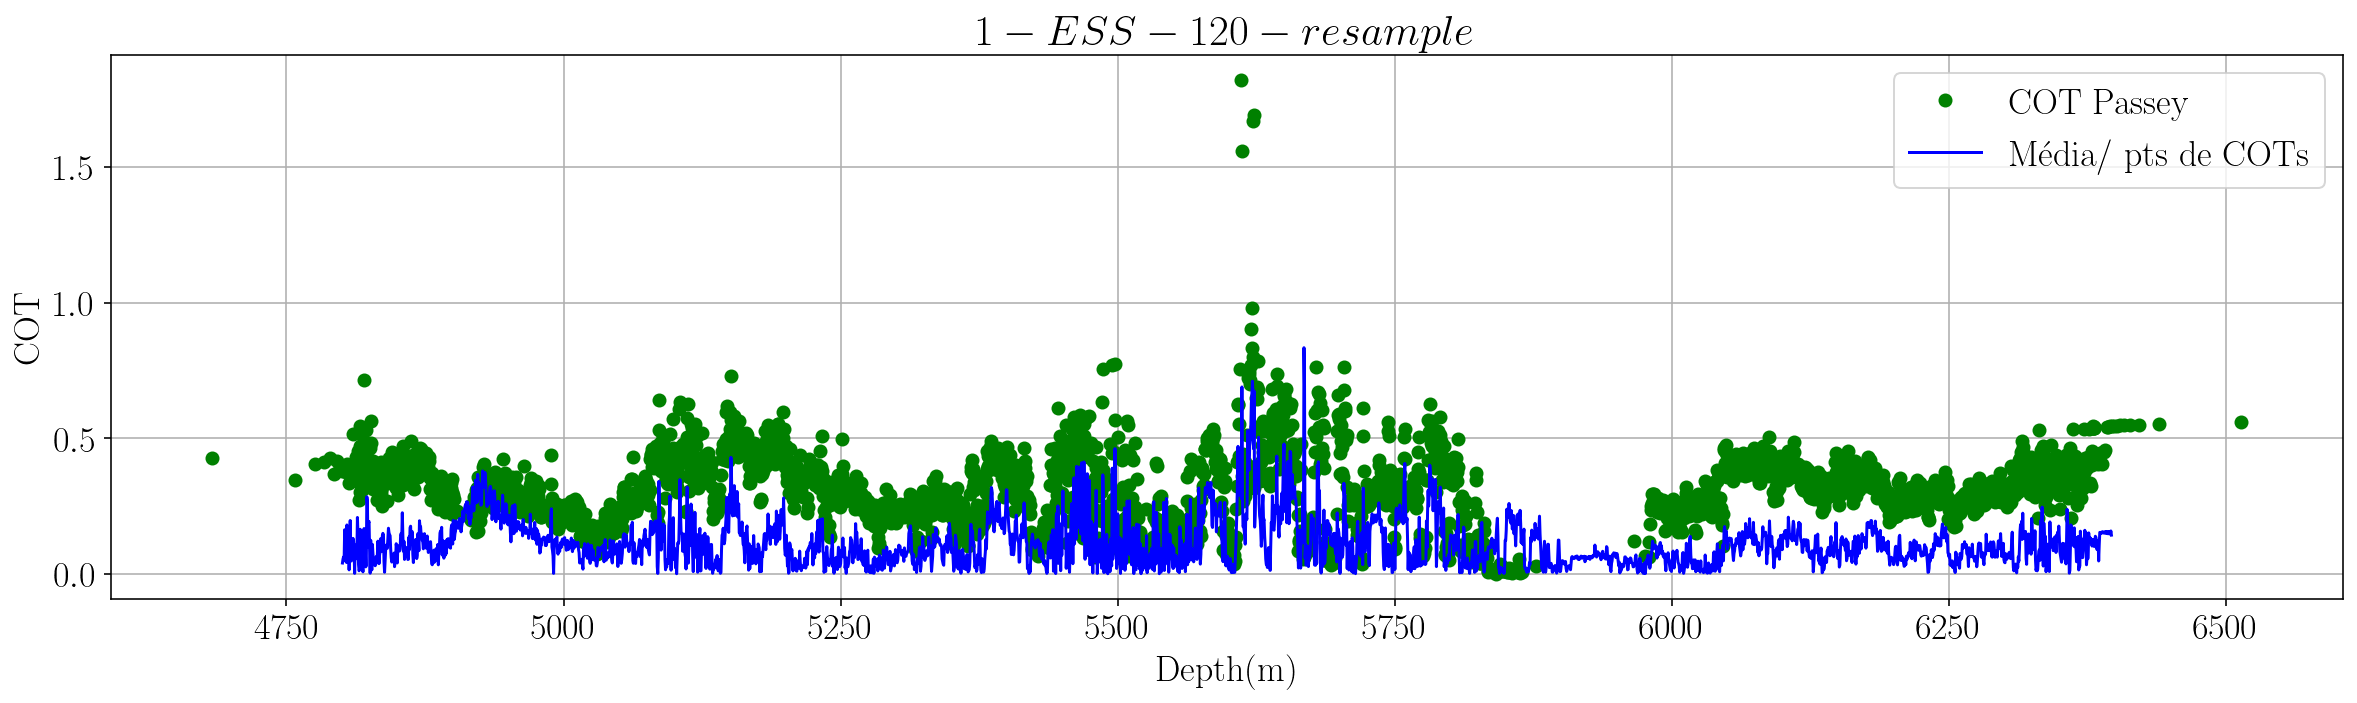

In [99]:
plt.plot(z_r, COT_r/10, 'go', z_ra, abs((COT_ra - (COT_r /10)))/2,'b-')
plt.grid()
plt.legend(['COT Passey', 'Média/ pts de COTs'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/PasseyXMedia de pts.png')
plt.show()


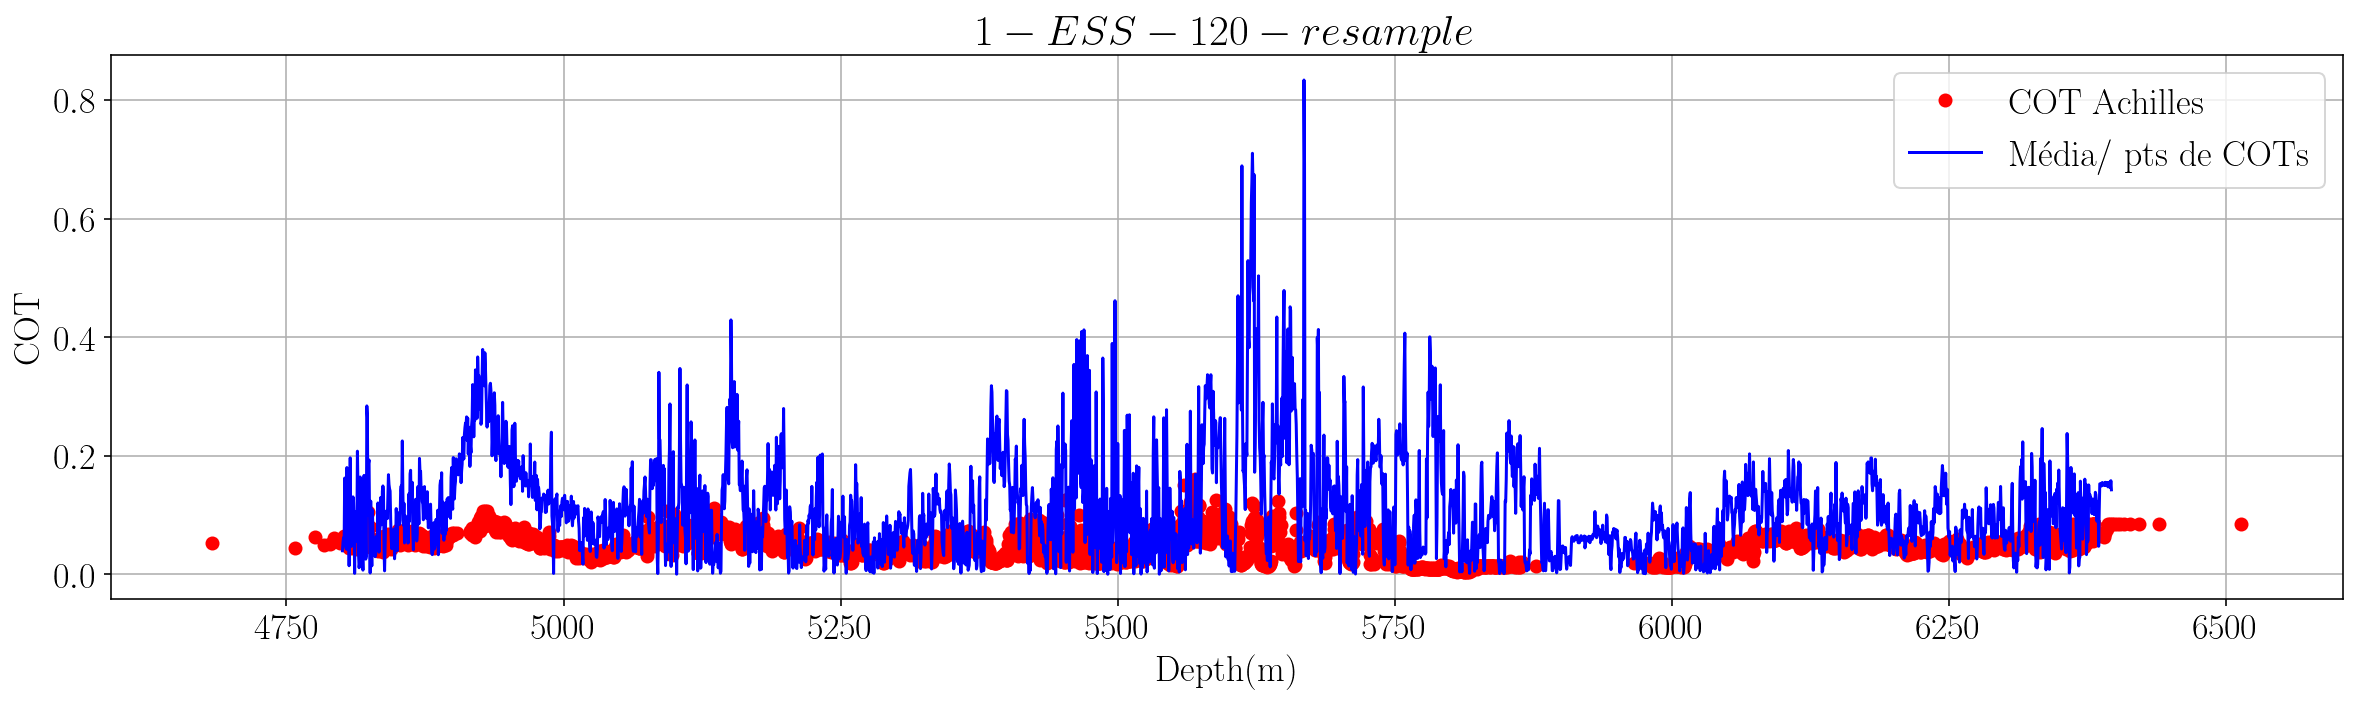

In [100]:
plt.plot(z_r, COT_ra/10, 'ro', z_ra, abs((COT_ra - (COT_r /10)))/2,'b-')
plt.grid()
plt.legend(['COT Achilles', 'Média/ pts de COTs'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/AchillesXMedia de pts.png')
plt.show()


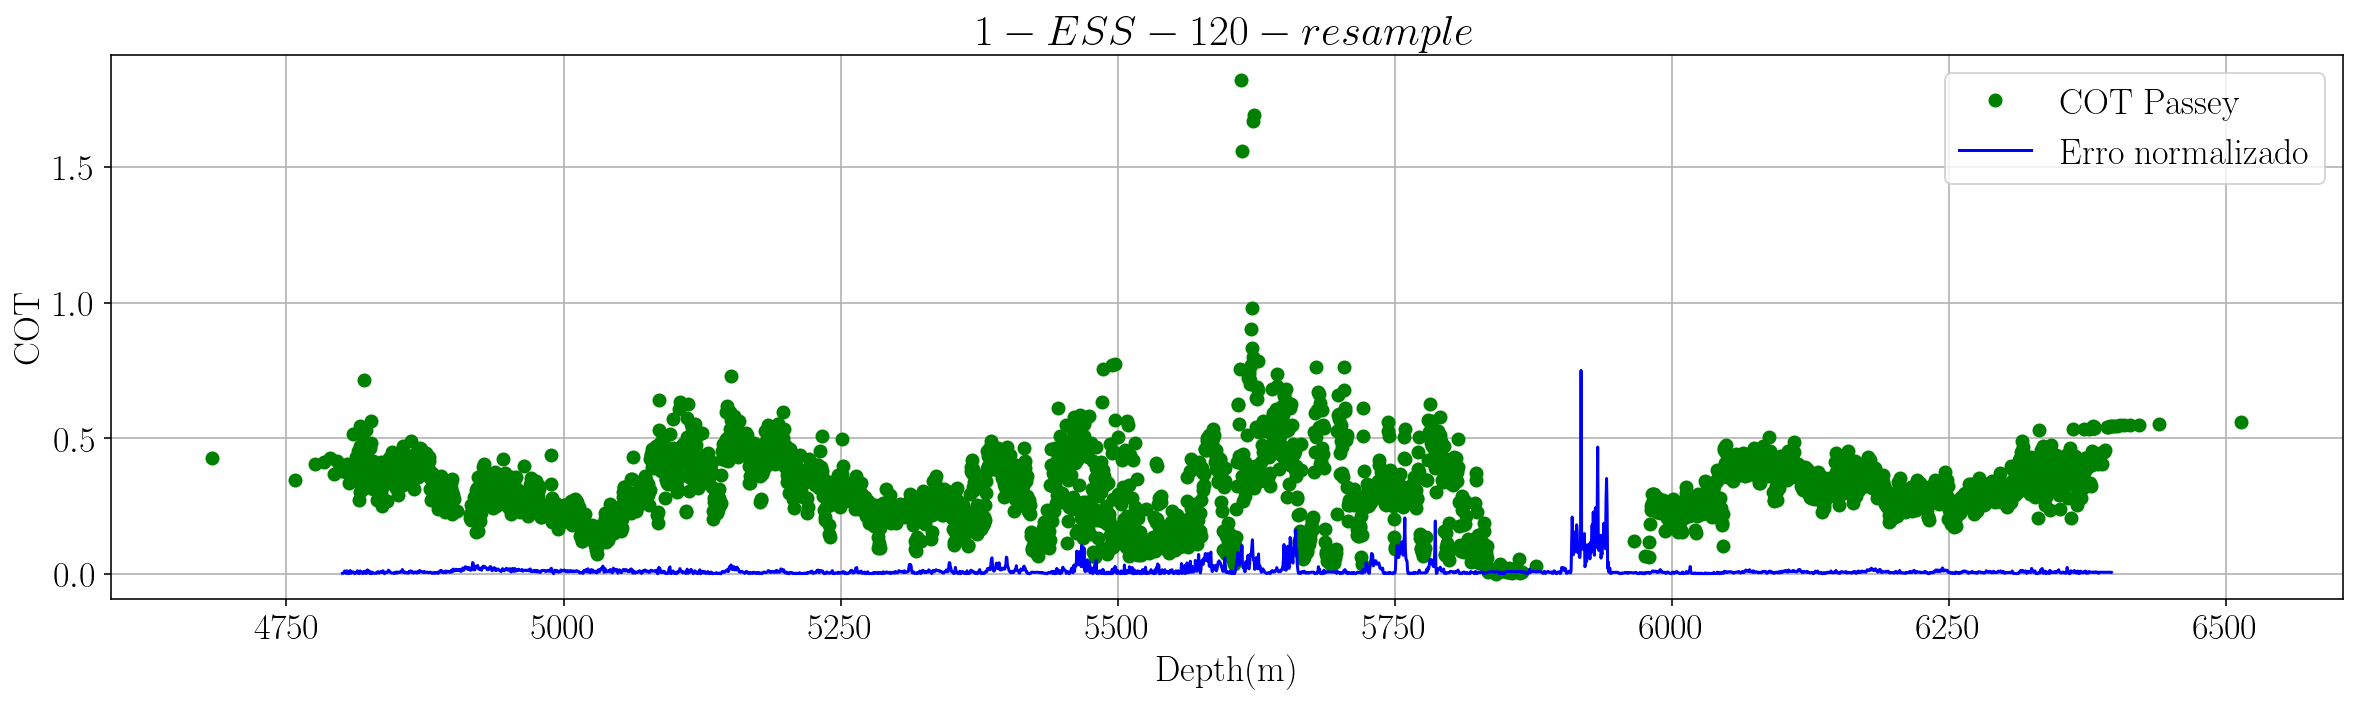

In [101]:
plt.plot(z_r, COT_r/10, 'go', z_ra, abs((COT_ra - (COT_r /10)))/abs((COT_r *10)),'b-')
plt.grid()
plt.legend(['COT Passey', 'Erro normalizado'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/Passey erro norm.png')
plt.show()


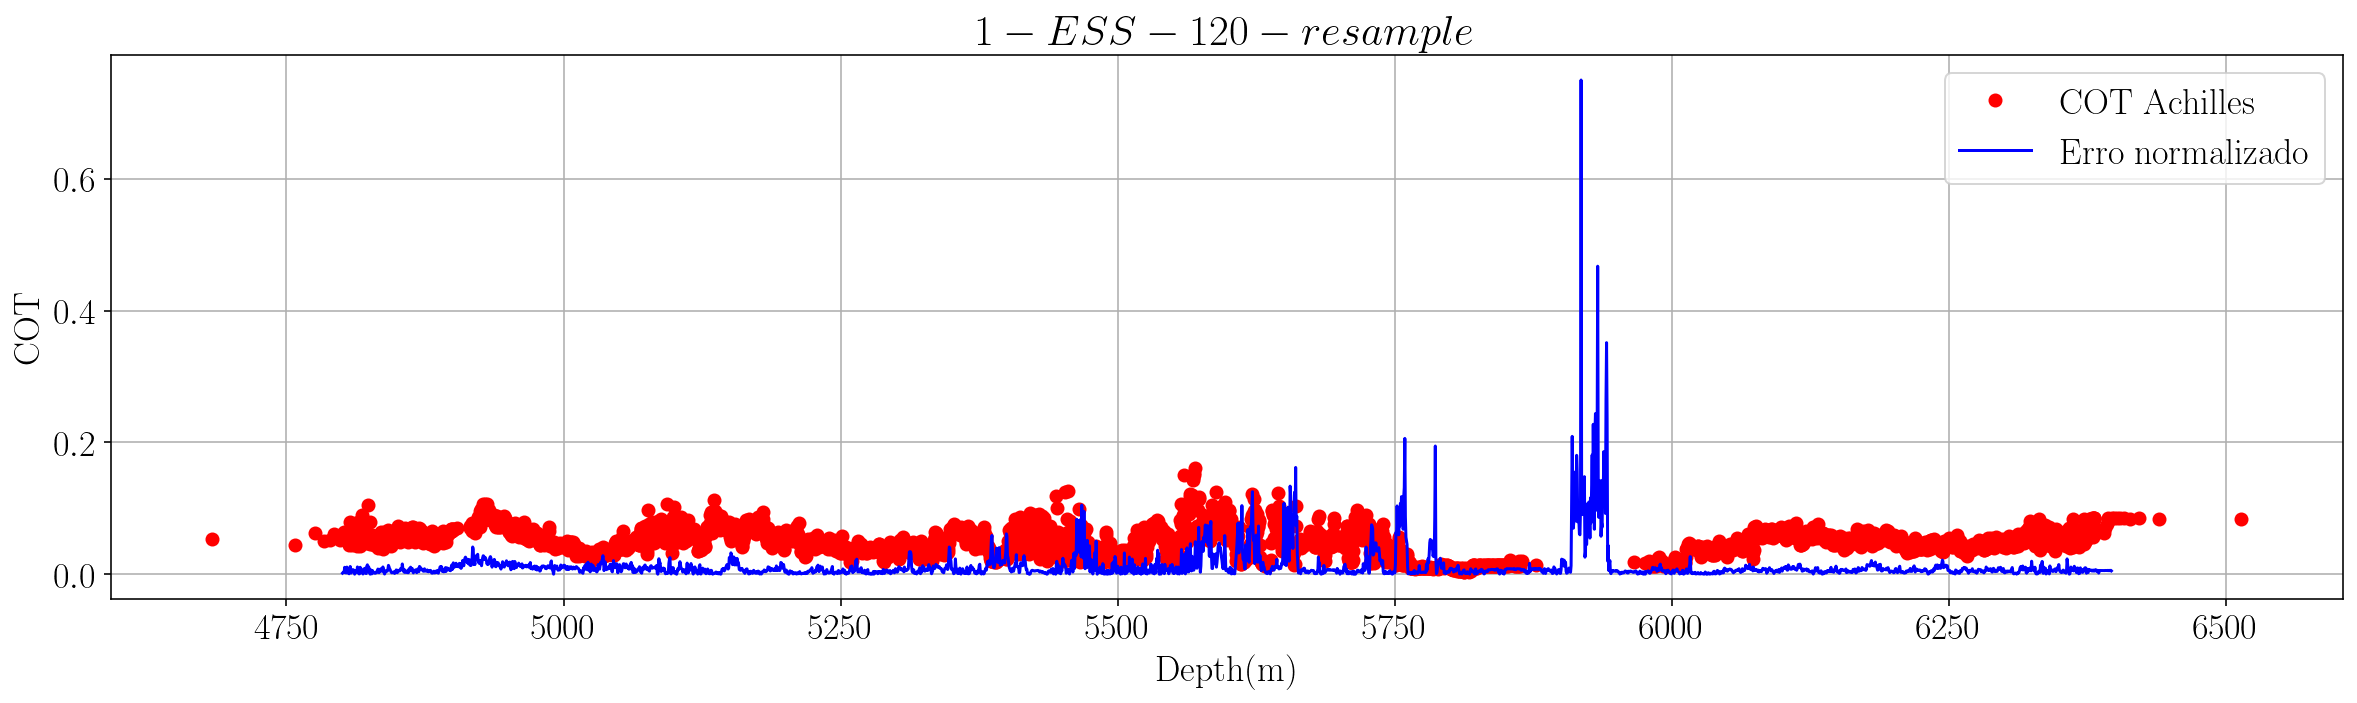

In [102]:
plt.plot(z_r, COT_ra/10, 'ro', z_ra, abs((COT_ra - (COT_r /10)))/abs((COT_r *10)),'b-')
plt.grid()
plt.legend(['COT Achilles', 'Erro normalizado'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/Achilles erro norm.png')
plt.show()


# Incerteza das medidas de COT

A incerteza é uma grandeza relacionada diretamente com o conceito de precisão, que é tanto maior na medida quanto menor for a incerteza a ela associada. Não podemos quantificar a incerteza simplesmente pela média da diferença entre o valor medido e o verdadeiro, porque a diferença, que pode ser tanto positiva quanto negativa, tem valor médio nulo, o que não é nada informativo.

A forma de expressão do valor do $COT$ se fará por meio da média dos valores medidos num conjunto de $N$ medidas dela, isto é, $\{COT_{i} | i = 1, 2, ..., N\}$. O valor médio da grandeza $x$ é dado por:

$$
\bar{COT} = \dfrac{1}{N} \sum_{i=1}^{N} COT_{i}
$$

O valor da incerteza associada às medições da grandeza $COT$, por sua vez, pode ser tomado a partir
da variância ($\sigma^2$) do conjunto das $N$ medidas.

$$
\sigma^{2} = \dfrac{1}{1-N} \sum_{i=1}^{N} (COT_{i} - \bar{COT})
$$

A incerteza associada à medida da grandeza $COT$ é definida pelo desvio-padrão do conjunto das $N$ medidas ao se considerar a variância que não possui a mesma dimensão física do que a grandeza inicial.

$$
\sigma = \sqrt{\sigma^{2}_{COT}}
$$

O desvio-padrão $\sigma$ é, portanto, uma grandeza definida positiva e representa a incerteza relacionada a cada um dos dados, ou seja, avalia a distância entre cada medida e o valor verdadeiro do cojunto amostral. 
Considerando que a média foi calculada sobre $N$ medições, a representação padrão da grandeza $COT$ com a sua incerteza é dada por:

$$
COT = \bar{COT} \pm \sigma_{COT}
$$

Onde a incerteza do valor médio é descrita abaixo, pelo chamado desvio-padrão da média $\sigma_{COT}$

$$
\sigma_{COT} = \dfrac{\sigma}{\sqrt{N}}  
$$

## Utilizando o pacote uncertainties

In [108]:
#Cálculo dos parâmetros:
media = np.average(COT_r/10)
var = np.var(COT_r/10)
desvpad = np.std(COT_r/10)

In [122]:
ICOT = []
for i in range(np.size(z_r)):
    ICOT.append(ufloat(COT_r[i]/10, desvpad))

ICOT = np.array(ICOT)
print(ICOT)

[0.4972831293415584+/-0.1399039198087344
 0.4250393715147183+/-0.1399039198087344
 0.3641062028809449+/-0.1399039198087344 ...
 0.5526858960912063+/-0.1399039198087344
 0.5284868943433816+/-0.1399039198087344
 0.5601233000510656+/-0.1399039198087344]


TypeError: can't convert an affine function (<class 'uncertainties.core.Variable'>) to float; use x.nominal_value

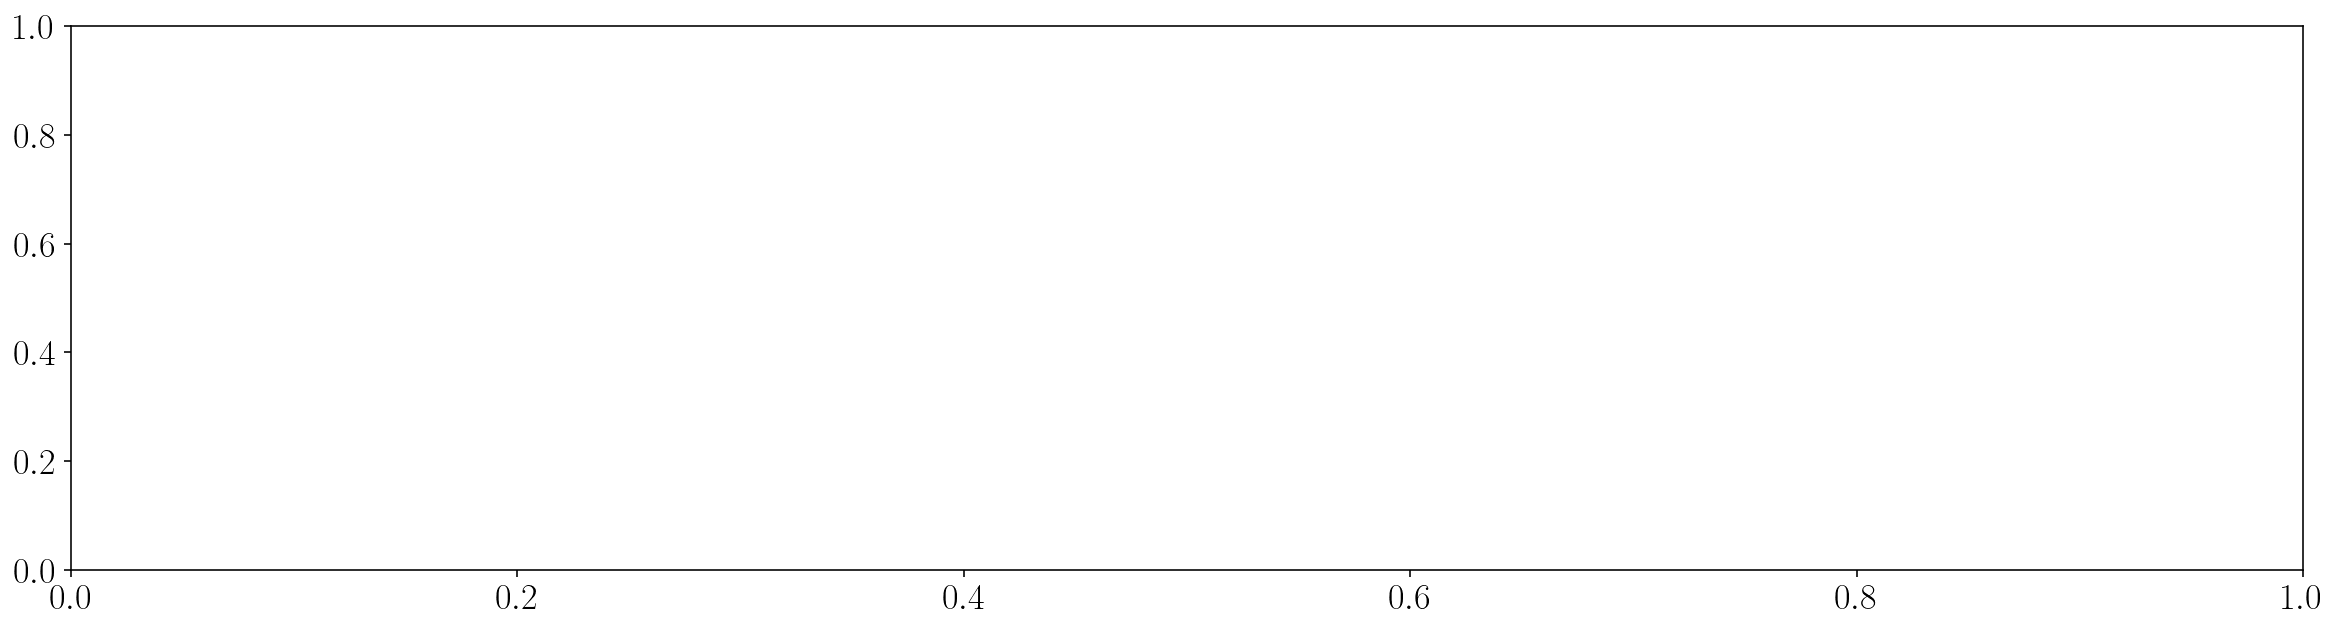

In [121]:
#plot do cot com a incerteza média:
plt.plot(z_r, ICOT, 'go',)
plt.grid()
plt.legend(['COT Achilles', 'Erro normalizado'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$1-ESS-120-resample$")
plt.savefig('../imagens/Achilles erro norm.png')
plt.show()